<a href="https://colab.research.google.com/github/jonmessier/Sales-Predictions/blob/main/Project_1_Part3(_Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 2 (core)
Project 1 - Part 2 (core)\
Jon Messier \
11/16/2022 \

[Coding Dojo Learn](https://login.codingdojo.com/m/606/13762/97764)

We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

Download the data using this link: [download the data](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing).

(Note: [Original data source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)). \
 \



##Data Dictionary 
<table><tbody><tr><td><strong>Variable Name</strong></td><td><strong>Description</strong></td></tr><tr><td>Item_Identifier</td><td>Unique product ID</td></tr><tr><td>Item_Weight</td><td>Weight of product</td></tr><tr><td>Item_Fat_Content</td><td>Whether the product is low fat or regular</td></tr><tr><td>Item_Visibility</td><td>The percentage of total display area of all products in a store allocated to the particular product</td></tr><tr><td>Item_Type</td><td>The category to which the product belongs</td></tr><tr><td>Item_MRP</td><td>Maximum Retail Price (list price) of the product</td></tr><tr><td>Outlet_Identifier</td><td>Unique store ID</td></tr><tr><td>Outlet_Establishment_Year</td><td>The year in which store was established</td></tr><tr><td>Outlet_Size</td><td>The size of the store in terms of ground area covered</td></tr><tr><td>Outlet_Location_Type</td><td>The type of area in which the store is located</td></tr><tr><td>Outlet_Type</td><td>Whether the outlet is a grocery store or some sort of supermarket</td></tr><tr><td>Item_Outlet_Sales</td><td>Sales of the product in the particular store. This is the target variable to be predicted.
<a href="https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction#why-does-the-the-problem-need-to-be-solved" id="user-content-why-does-the-the-problem-need-to-be-solved" class="anchor" aria-hidden="true" target="_blank"></a></td></tr></tbody></table>

## Imports
* Use Pandas to read the sales prediction data set into Google Colab.
* Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/content/sales_predictions.csv')
url = 'https://drive.google.com/uc?id=1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw&export=download'
df = pd.read_csv(url)
display(df.head())
print(df.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


### 1) How many rows and columns?

In [ ]:
print('(Rows, Columns)')
df.shape

(Rows, Columns)


(8523, 12)

### 2) What are the datatypes of each variable?

In [ ]:
print("The columns of the the sales prediction file have the following data types")
display(df.dtypes)


The columns of the the sales prediction file have the following data types


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##Data Cleaning
  * Explore the data - what do you need to do to clean this data? Clean it!
  * Be sure to address each of the following tasks:


### 3) Are there duplicates? If so, drop any duplicates.

In [ ]:
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 0


In [ ]:
#If we had duplicates
#df.drop_duplicates(inplace=True)

### 4) Identify missing values
From the df.isna().sum() we can see that there a couple of columns with Null data
- 'Item_Weight' has 1463 null entries
- 'Outlet_Size' has 2410 null entries

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5) Address Missing Values
Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

### 5.A 'Item_Weight'
Begin with a statitistical look at the Item_Weight. This is a numerical column so using a calculated approach to fill the missing data is appropriate.  

In [ ]:
# 5 a) Begin with the statistics on 'Item_Weight'. 
df.groupby('Item_Type')['Item_Weight'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.28,4.77,4.88,8.24,11.65,15.75,20.85
Breads,204.0,11.35,4.44,4.64,7.13,10.60,14.85,20.85
Breakfast,89.0,12.77,5.04,6.42,8.06,10.70,17.25,21.10
Canned,539.0,12.31,4.59,4.62,8.12,12.15,16.25,21.35
Dairy,566.0,13.43,4.69,4.80,9.28,13.35,17.60,20.70
Frozen Foods,718.0,12.87,4.51,4.56,8.94,12.85,17.00,20.85
Fruits and Vegetables,1019.0,13.22,4.58,5.46,9.20,13.10,17.10,21.35
Hard Drinks,183.0,11.40,4.24,4.61,8.26,10.10,14.85,19.70
Health and Hygiene,430.0,13.14,4.51,5.18,9.70,12.15,17.60,21.25


>After reviewing the statistics on the Item Weights by Item_Type, I can see that the values have a normal distribution about the mean with min() and max() within 2std.  This looks like a close sample of data, there adding to the mean will have little impact.  Replace missing Item_Weights with the mean() value of the Item_Type weight.  


In [ ]:
#Replace the NaN weights with the mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
#display the results compared to previous output.  Notice that the mean doesnt change much, but the count goes up to include non-Nan values
df.groupby('Item_Type')['Item_Weight'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,12.38,4.35,4.88,9.10,12.86,15.15,20.85
Breads,251.0,11.63,4.04,4.64,8.00,12.80,14.08,20.85
Breakfast,110.0,12.79,4.53,6.42,8.27,12.86,16.50,21.10
Canned,649.0,12.40,4.18,4.62,8.63,12.86,15.70,21.35
Dairy,682.0,13.33,4.27,4.80,10.80,12.86,16.74,20.70
Frozen Foods,856.0,12.87,4.13,4.56,9.30,12.86,16.10,20.85
Fruits and Vegetables,1232.0,13.16,4.16,5.46,10.17,12.86,16.35,21.35
Hard Drinks,214.0,11.61,3.95,4.61,8.37,11.23,14.65,19.70
Health and Hygiene,520.0,13.09,4.10,5.18,10.10,12.86,16.60,21.25


>Comparing the above output to the dataframe containing NaN values you can see a a large increase in the item count and and a small increase mean 'Item_Weight' for all item types.  This makes sense since we are adding many entries where the Item_Weight is mean value of the NaN data set. 

### 5.B 'Outlet_Size'
'Outlet_Size' is a categorical column, so we must impart our wisdom on to the missing values.  Let's look at the list of values and their counts to determine how we fill the empty values

In [ ]:
print(df['Outlet_Size'].value_counts())
print('Number of NaN Outlet_Size values: ')
df['Outlet_Size'].isna().sum()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Number of NaN Outlet_Size values: 


2410

>There are 2410 missing Outlet size entries.  The distribution of Outlet Size are Medium (53%), small(46%), High(11%). Since we're not really doing anything analytic with this data, and we do not know any context behind the values we're missing we cannot setup a reasonable model for inserting values.  Therefore we will fill the missing values with "Unkown"


In [ ]:
df['Outlet_Size'].fillna('Unknown', inplace=True)
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

### 6) Confirm that there are no missing values after addressing them.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7) Inconsistent Categories
Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
- Categorical data is a non-numeric data type : 'object'
- Look at the datatypes of all columns.  If there is a column that you think is *numeric* but shows as an *object*, you could try converting it to a numeric type.  this would create an error(s) on non-numeric entries.  You could go back in and update those entries manually.

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Create a list of all columns with *object* data type

In [ ]:
data_types = df.dtypes
cols = data_types[data_types=='object'].index
cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Loop through all the columns of data that have an object data type and output the count unique values to see if there are some changes we can/should make.  Use the *df['col].value_counts()* function.  This lets me see if data was entered correctly.

In [ ]:
for name in cols:
 print(f"The unique values of the feature {name} are:\n")
 print(df[name].value_counts())
 print("\n")

The unique values of the feature Item_Identifier are:

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The unique values of the feature Item_Fat_Content are:

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The unique values of the feature Item_Type are:

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The unique values of the 

Looks like there is some cleanup needed in the "Item_Fat_Content" feature.  We can change the outliers:
- **'LF (316)' and 'low fat (112)' --> 'Low Fat (5089)'**
- **'reg'(117) --> 'Regular'(2889)** 

Use *df.replace()* to update these mistyped entries.  Show the updated column unique value counts

In [ ]:
df.replace(to_replace=['LF', 'low fat'], value='Low Fat', inplace=True)
df.replace('reg','Regular', inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 8) Statistics
For any numerical columns, obtain the summary statistics of each (min, max, mean). We only want to look at numeric datatypes

In [ ]:
types = df.dtypes

In [ ]:
df.select_dtypes(include=np.number).describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


> Reviewing the statitistics, we do not have an large outliers in the numerical columns.  No changes to the numeric data needed at this time

# Project 1 - Part 3(core)
**Assignment:**

We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!

Commit your work to GitHub.

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

## Plot and Review Data

- [ ] Separate the data into Numerical and Categorical by feature type
- [ ] Create a list of columns with `dtype = number`.  These datatypes will be looked at with boxplots for outliers.
- [ ] Create a list of columns with `dtype = object`.  These datatypes will be looked at with histogram plots only.
- [ ] Create a custom function called `plot_charts` to plot the histogram and [optional boxplot] on the same axis for each feature
  - [ ] Stylize the plots in the function
- [ ] Loop through the lists of Numerical and Categorical features and plot histograms/boxplots


In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
obj_cols = df.select_dtypes('object').columns
#drop the "Item_Identifier" from out list
obj_cols.drop(['Item_Identifier'])
print(type(obj_cols))

#Drop the first item in the obj_cols - This is the "Item_Identifier" and is unique for each entry.  No relevant data from histogram
obj_cols=obj_cols[1:]
obj_cols

<class 'pandas.core.indexes.base.Index'>


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Function: `plot_charts`

In [ ]:
def plot_charts(df, col, boxplot = False):
 if boxplot:
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,3), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  #Histogram axes[0]
  sns.histplot(data=df,x = col,ax = axes[0])
  #add the mean to the histogram
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
            label=f"Mean Value = ${mean_value:,.2f}",);
  #add the median to the histogram
  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
            label=f"Median Value = ${med_value:,.2f}");

  #boxplot -- axes[1]
  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'Histogram and Box plot for {col}')

# Turn off the comparitive boxplot  
 else:
   sns.set(style="darkgrid")
   fig, axes = plt.subplots(figsize=(10,3))
   plt.xticks(rotation=45)
   sns.histplot(data=df,x=col, color='#69b3a2', alpha=0.3, ax=axes)
      
 ## Fixing any overlapping labels and showing
 plt.tight_layout()
 plt.show()

### Numeric Data - Histogram and Boxplots

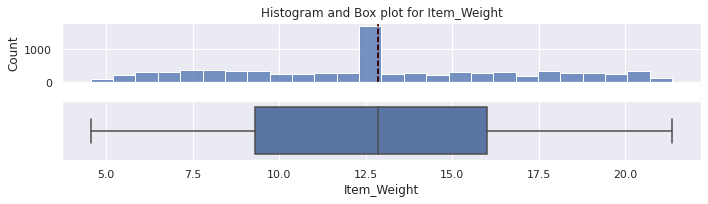

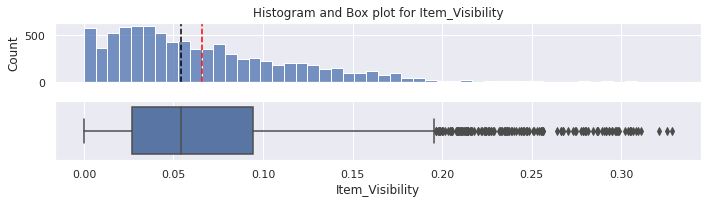

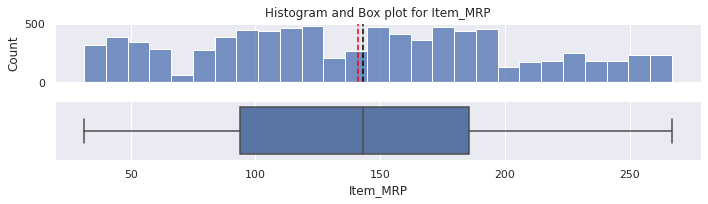

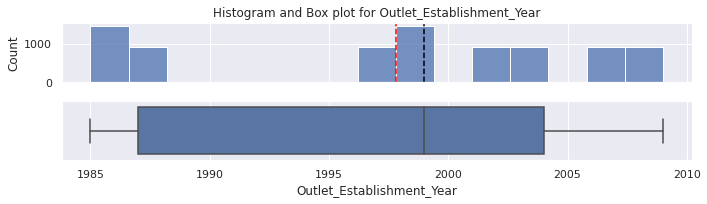

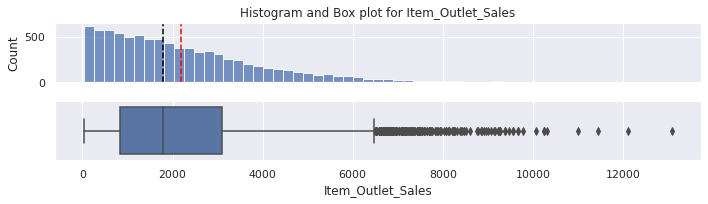

In [ ]:
for col in num_cols:
  plot_charts(df, col, boxplot=True)

### Numeric Data - Observations
>- `Item_Weight` : The majority of Items weigh about the same (12.5).   
- `Item_Visibility` : No Observations made
- `Item_MRP` : The Median MRP is aprox 140.  There are no outliers for MRP, which tells us we properly cleaned the data
- `Outlet_Establishment_Year` :  The outlet establishment dates were between 1987 and 2004.  The histogram shows that the greatest count of sales happened in the outlets established in 1985-86, and 1998-1999.  
- `Item_Outlet_Sales` : The median item_outlet_sales value is approx 1800.  This appears to show how frequently items are being sold in outlets.  There are many items that go way outside the 75% maximum of the barplot

### Categorical Data - Histogram only


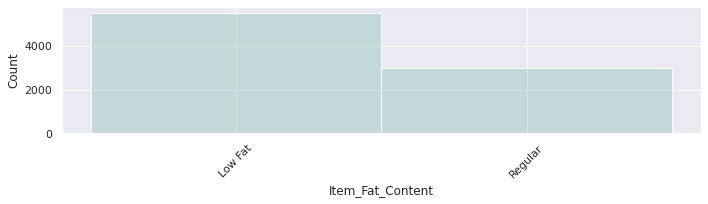

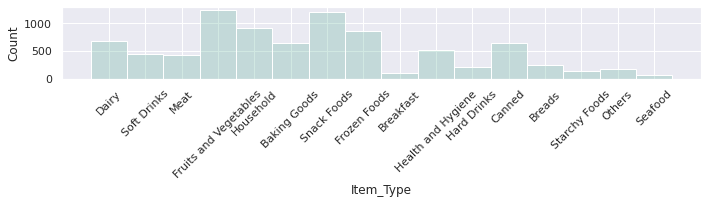

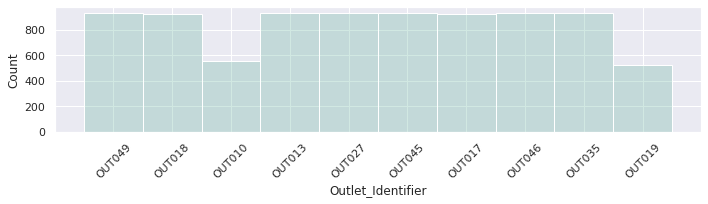

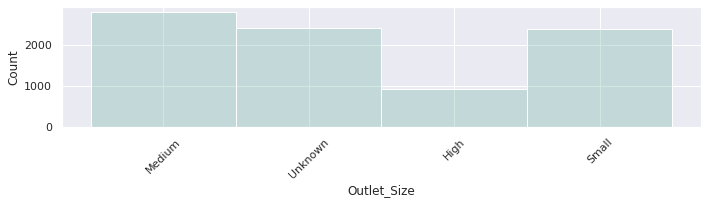

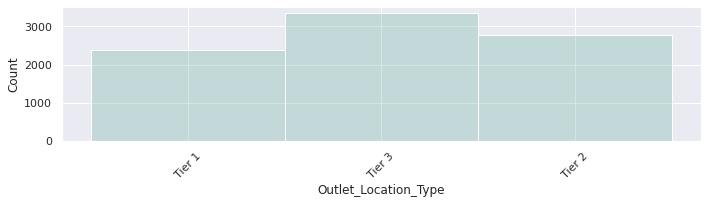

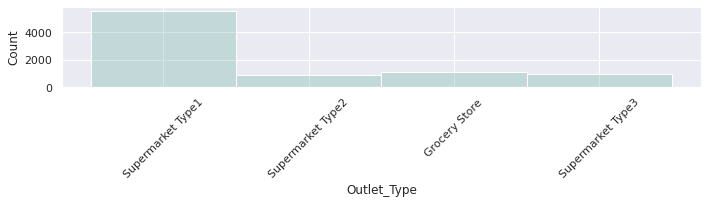

In [ ]:
for col in obj_cols:
  plot_charts(df, col, boxplot=False)

### Categorical Data- Obeservations
>When reviewing categorical data it is important to note that the output of the graphs is simply the count of occurances of that category type for the sale entries.  This does not reflect sales, but is rather a count of specific units sold and their accompanying data.
- `Item_Fat_Content` : *Low Fat* foods is make up a far greater count of total sales than the *Regular* foods.
- `Item_Types` : *Fruits and Vegetables* and *Snack Foods* are the two largest categories of 
- `Outlet_Identifier` : No observations made. This data is not relavant for analysis
- `Outlet_Size` : *Medium* and *Unknown* make up the two largest categories of outlet_size
- `Outlet_Location_Type`: *Tier 3* locations show the greatest number of sales followed by *Tier 2* and ulitimately *Tier 3* locations
- `Outlet_Type` : *Supermarket Type1* has the greatest count of sales by far.  

##Heatmap

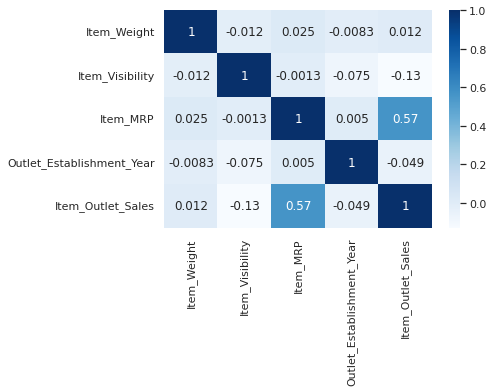

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

### Heatmap Observations
>There is a "moderate" correlation between Item_MRP and Item_Outlet_Sales.  This relationship tells us that the higher MRP leads to higher Outlet_Sales.  Although its only a "moderate" correlation it is telling us the customers purchase higher MRP products more frequently.